In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sb
from plotter import *

In [20]:
path = 'simulations/uiuc/data_files/UIUC_CC30_52.sqlite'
path = 'simulations/uiuc/data_files/UIUC_LIMSOL_52.sqlite'
conn = sqlite3.connect(path)

In [21]:
cursor = conn.cursor()
command = """SELECT DISTINCT scenario FROM Output_VFlow_Out"""
tab = cursor.execute(command)
scenarios = [s[0] for s in cursor.fetchall()]
scenarios

OperationalError: no such table: Output_VFlow_Out

In [22]:
place = "UIUC"
carrier = 'ELC'
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

elc_df = pd.concat(frames)
elc_df

OperationalError: no such table: time_periods

In [8]:
cap_tech_df = elc_df.drop(columns='SID')

<AxesSubplot:>

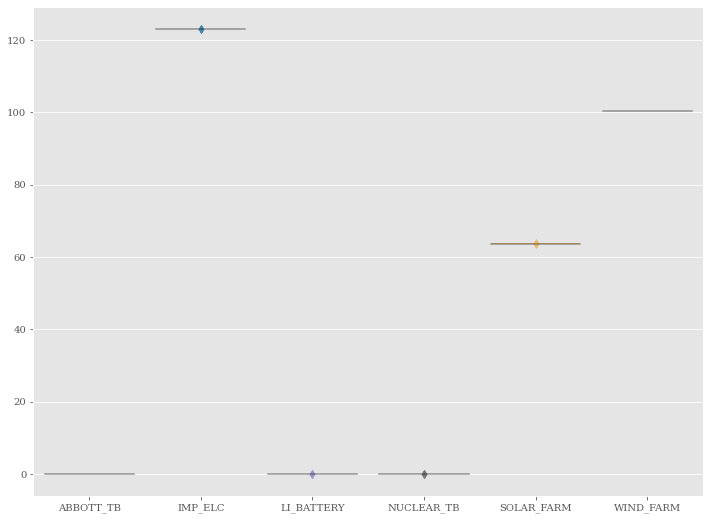

In [9]:
sb.boxenplot(data=cap_tech_df[cap_tech_df.index == 2050])

In [10]:
place = "UIUC"
carrier = ['STM', 'NUC_STM']
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

stm_df = pd.concat(frames)
stm_df.replace(12703.504000, np.nan, inplace=True)
stm_df

,ABBOTT,NUCLEAR_THM,SID
year,,,
2025,261.030000,20.055287,LIMSOL_mga_0
2030,261.030000,21.089465,LIMSOL_mga_0
2035,261.030000,22.066905,LIMSOL_mga_0
2040,156.618000,23.122270,LIMSOL_mga_0
2045,64.265840,44.883561,LIMSOL_mga_0
2050,64.265840,87.783647,LIMSOL_mga_0
2025,261.030000,20.068784,LIMSOL_mga_1
2030,261.030000,21.078882,LIMSOL_mga_1
2035,261.030000,22.082351,LIMSOL_mga_1


In [11]:
full_df = pd.concat([elc_df, stm_df], axis=1).drop_duplicates()
full_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM,SID,ABBOTT,NUCLEAR_THM,SID
year,,,,,,,,,,
2025,0.0,54.088815,0.000000e+00,-0.000007,35.684237,100.5,LIMSOL_mga_0,261.030000,20.055287,LIMSOL_mga_0
2030,0.0,57.056860,0.000000e+00,-0.000007,41.521799,100.5,LIMSOL_mga_0,261.030000,21.089465,LIMSOL_mga_0
2035,0.0,61.826504,0.000000e+00,-0.000007,49.872766,100.5,LIMSOL_mga_0,261.030000,22.066905,LIMSOL_mga_0
2040,0.0,74.429146,0.000000e+00,-0.000007,54.127992,100.5,LIMSOL_mga_0,156.618000,23.122270,LIMSOL_mga_0
2045,0.0,99.446750,0.000000e+00,-0.000007,58.099388,100.5,LIMSOL_mga_0,64.265840,44.883561,LIMSOL_mga_0
2050,0.0,123.018300,0.000000e+00,-0.000007,63.670625,100.5,LIMSOL_mga_0,64.265840,87.783647,LIMSOL_mga_0
2025,0.0,54.089094,0.000000e+00,0.000523,34.937716,100.5,LIMSOL_mga_1,261.030000,20.068784,LIMSOL_mga_1
2030,0.0,57.056959,0.000000e+00,0.000523,41.256831,100.5,LIMSOL_mga_1,261.030000,21.078882,LIMSOL_mga_1
2035,0.0,61.841231,0.000000e+00,0.000523,49.663180,100.5,LIMSOL_mga_1,261.030000,22.082351,LIMSOL_mga_1


full_df.replace(12703.504000, np.nan, inplace=True)

In [12]:
full_cap_df = full_df.drop(columns='SID')

<AxesSubplot:>

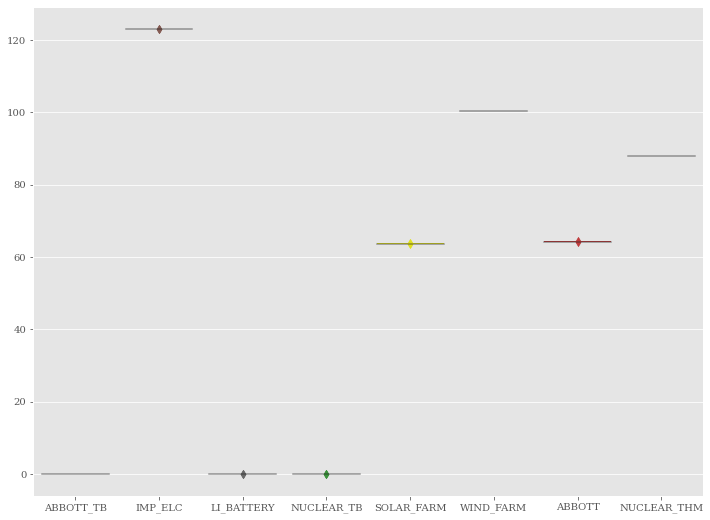

In [13]:
sb.boxenplot(data=full_cap_df[full_cap_df.index == 2050], palette=elc_colors)

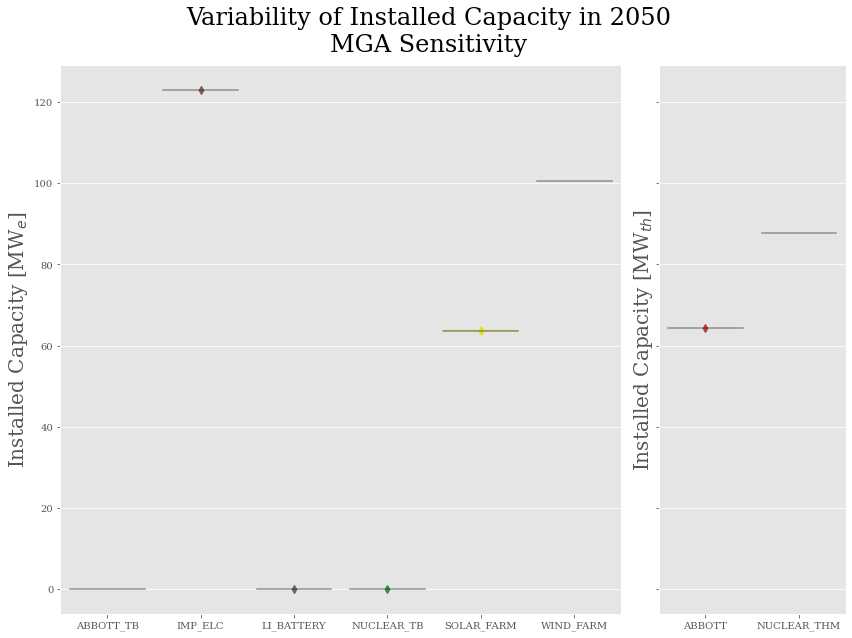

In [14]:
fig, axes = plt.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})
sb.boxenplot(ax=axes[1], data=stm_df.drop(columns="SID").loc[2050], palette=elc_colors)
sb.boxenplot(ax=axes[0], data=elc_df.drop(columns="SID").loc[2050], palette=elc_colors)
axes[0].set_ylabel('Installed Capacity [MW$_e$]', fontsize=20)
axes[1].set_ylabel('Installed Capacity [MW$_{th}$]', fontsize=20)
plt.suptitle('Variability of Installed Capacity in 2050\nMGA Sensitivity', fontsize=24)
plt.tight_layout()

In [15]:
place = "UIUC"
carrier = 'CHW'
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

cw_df = pd.concat(frames)
cw_df.replace(12703.504000, np.nan, inplace=True)
cw_df

,CWS,CW_STORAGE,SID
year,,,
2025,26577.013,5249.3240,LIMSOL_mga_0
2030,29112.477,5249.3240,LIMSOL_mga_0
2035,31636.884,5249.3240,LIMSOL_mga_0
2040,34077.864,5249.3240,LIMSOL_mga_0
2045,36066.765,5249.3726,LIMSOL_mga_0
2050,41417.040,5249.3726,LIMSOL_mga_0
2025,26578.340,5248.0797,LIMSOL_mga_1
2030,29110.803,5248.2320,LIMSOL_mga_1
2035,31636.884,5248.2813,LIMSOL_mga_1


<AxesSubplot:>

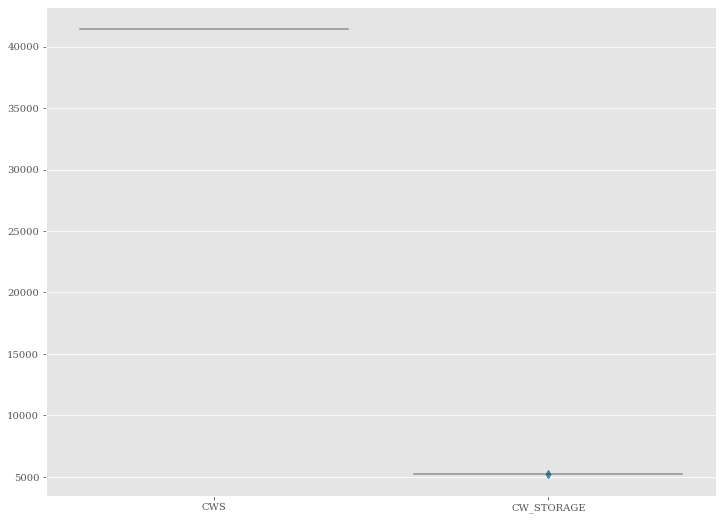

In [16]:
sb.boxenplot(data=cw_df.drop(columns='SID').loc[2050])

<AxesSubplot:xlabel='year'>

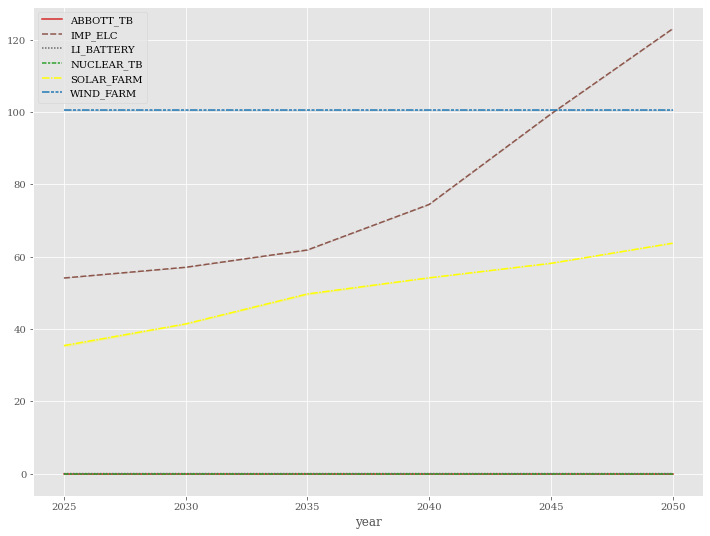

In [17]:
sb.lineplot(data=elc_df.drop(columns='SID'), palette=elc_colors)

In [18]:
v = list(elc_df.columns)
i = list(range(len(v)))
d = dict(zip(v,i))

sb.lineplot(x=elc_df['SID'],y=elc_df.iloc[d['SOLAR_FARM']], palette=elc_colors)

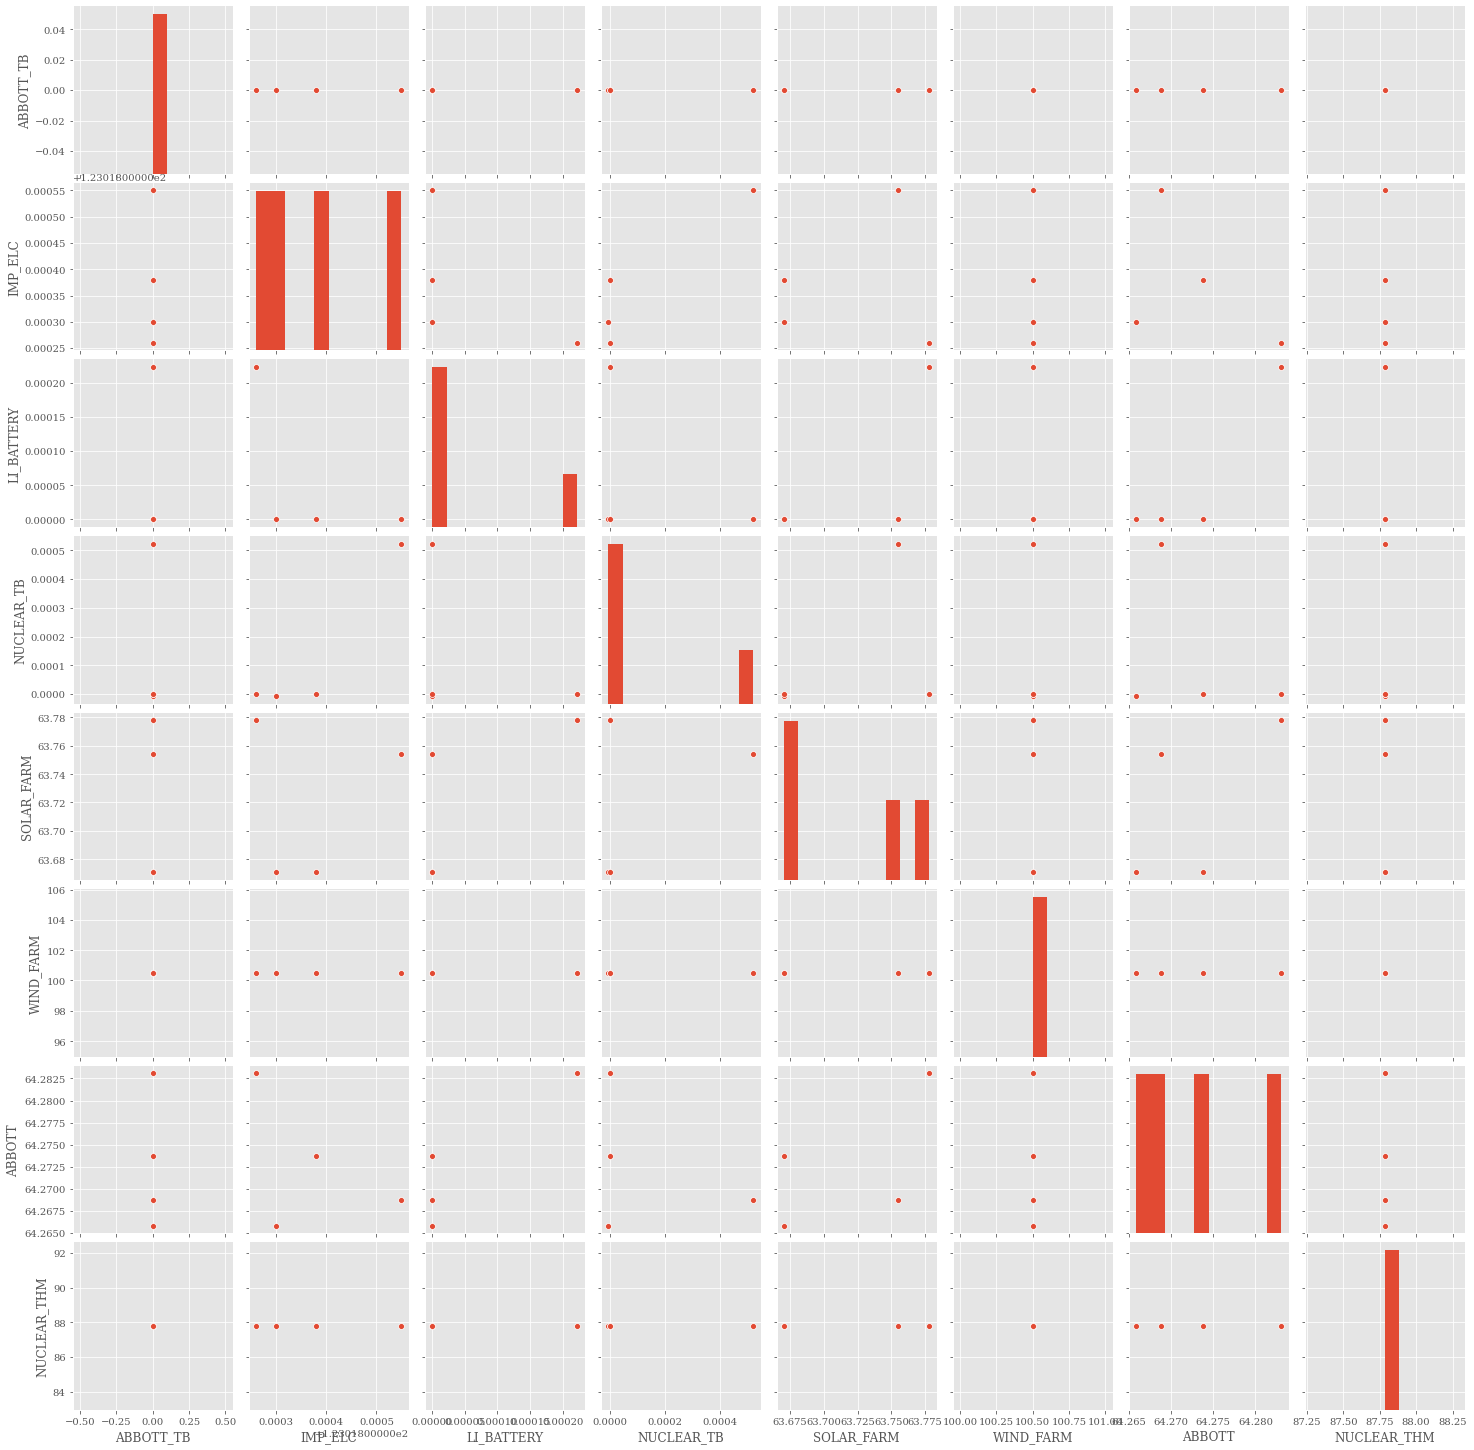

In [19]:
sb.pairplot(full_df.drop(columns='SID').groupby(elc_df.index).get_group(2050))